In [2]:
import nmresearch as nmr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

c:\Users\awsta\Documents\qeg-env\Lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


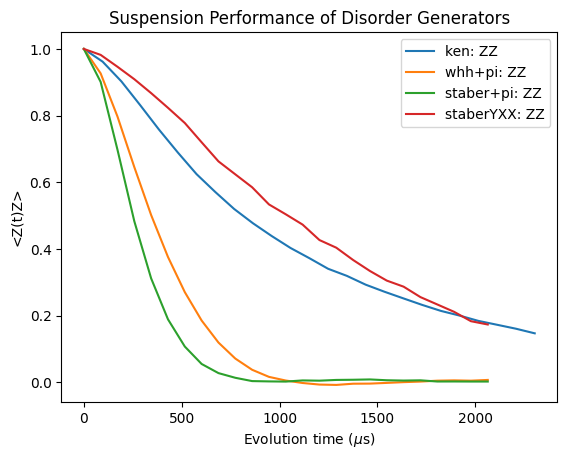

In [3]:
staber_pi = nmr.Experiment(344, folder="expt9").load_tpc(use_real=False)
whh_pi_susp_fc = nmr.Experiment(282, folder="expt9").load_tpc(
    use_real=False, normalize=True
)
staberYXX_zz2 = nmr.Experiment(380, folder="expt9").load_tpc(
    use_real=False, normalize=True
)
staberYXX_xx1 = nmr.Experiment(382, folder="expt9").load_tpc(
    use_real=False, normalize=True
)
ken16_susp_fc = nmr.Experiment(279, folder="expt9").load_tpc(
    use_real=False, normalize=True
)
t_list = np.arange(0, 25 * 96, 96)

plt.plot(t_list, ken16_susp_fc, label="ken: ZZ")
plt.plot(t_list * (43 * 2 / 96), whh_pi_susp_fc, label="whh+pi: ZZ")
plt.plot(t_list * (43 * 2 / 96), staber_pi[:25], label="staber+pi: ZZ")
plt.plot(t_list * (43 * 2 / 96), staberYXX_zz2[:25], label="staberYXX: ZZ")
# plt.plot(t_list*(43*2/96),staberYXX_xx[:25],label="staberYXX: XX")
plt.legend()
plt.xlabel(r"Evolution time ($\mu$s)")
plt.ylabel("<Z(t)Z>")
plt.title("Suspension Performance of Disorder Generators")
plt.show()

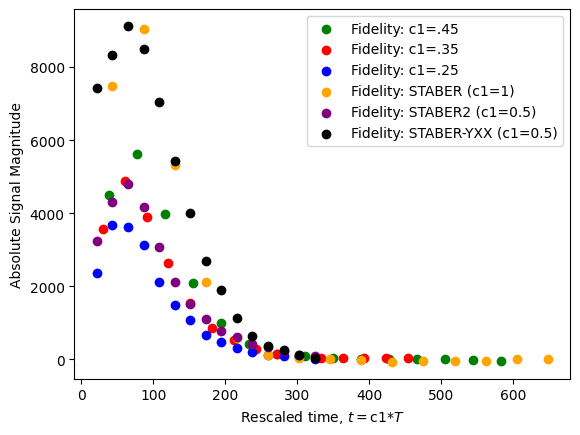

In [4]:
diz_fidelity_short_25 = nmr.Experiment(317, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

diz_fidelity_short_35 = nmr.Experiment(318, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

diz_fidelity_short_45 = nmr.Experiment(319, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

diz_staber_fid = nmr.Experiment(346, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

diz_staber2_fid = nmr.Experiment(352, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

diz_staberYXX_fid = nmr.Experiment(353, folder="expt9").load_tpc(
    use_real=False, normalize=False
)


T = 3.6 * 24

times = np.arange(T, 16 * T, T)

plt.scatter(
    (0.45) * times,
    diz_fidelity_short_45,
    label="Fidelity: c1=.45",
    marker="o",
    color="green",
)

plt.scatter(
    (0.35) * times,
    diz_fidelity_short_35,
    label="Fidelity: c1=.35",
    marker="o",
    color="red",
)

plt.scatter(
    (0.25) * times,
    diz_fidelity_short_25,
    label="Fidelity: c1=.25",
    marker="o",
    color="blue",
)

plt.scatter(
    (1) * times / 2,
    diz_staber_fid,
    label="Fidelity: STABER (c1=1)",
    marker="o",
    color="orange",
)

plt.scatter(
    (0.5) * times / 2,
    diz_staber2_fid,
    label="Fidelity: STABER2 (c1=0.5)",
    marker="o",
    color="purple",
)

plt.scatter(
    (0.5) * times / 2,
    diz_staberYXX_fid,
    label="Fidelity: STABER-YXX (c1=0.5)",
    marker="o",
    color="black",
)

plt.legend()

plt.xlabel(r"Rescaled time, $t =$c1*$T$")

plt.ylabel("Absolute Signal Magnitude")

plt.show()

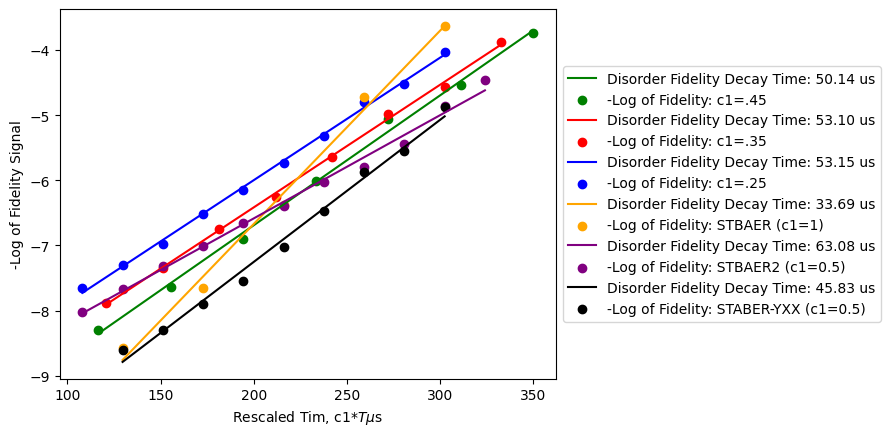

In [5]:
x = (0.45) * times[2:9]
y = -np.log(diz_fidelity_short_45[2:9])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1 / pz[0]),
    color="green",
)
plt.scatter(x, y, label="-Log of Fidelity: c1=.45", marker="o", color="green")

x = (0.35) * times[3:11]
y = -np.log(diz_fidelity_short_35[3:11])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1 / pz[0]),
    color="red",
)
plt.scatter(x, y, label="-Log of Fidelity: c1=.35", marker="o", color="red")

x = (0.25) * times[4:14]
y = -np.log(diz_fidelity_short_25[4:14])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1 / pz[0]),
    color="blue",
)
plt.scatter(x, y, label="-Log of Fidelity: c1=.25", marker="o", color="blue")

x = (1) * times[2:7] / 2
y = -np.log(diz_staber_fid[2:7])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1 / pz[0]),
    color="orange",
)
plt.scatter(x, y, label="-Log of Fidelity: STBAER (c1=1)", marker="o", color="orange")

x = (0.5) * times[4:15] / 2
y = -np.log(diz_staber2_fid[4:15])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1 / pz[0]),
    color="purple",
)
plt.scatter(
    x, y, label="-Log of Fidelity: STBAER2 (c1=0.5)", marker="o", color="purple"
)

x = (0.5) * times[5:14] / 2
y = -np.log(diz_staberYXX_fid[5:14])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"Disorder Fidelity Decay Time: {:0.2f} us".format(1 / pz[0]),
    color="black",
)
plt.scatter(
    x, y, label="-Log of Fidelity: STABER-YXX (c1=0.5)", marker="o", color="black"
)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel(r"Rescaled Tim, c1*$T \mu$s")
plt.ylabel("-Log of Fidelity Signal")
plt.show()

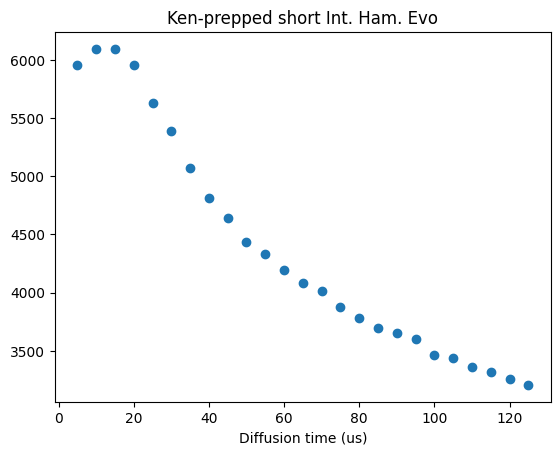

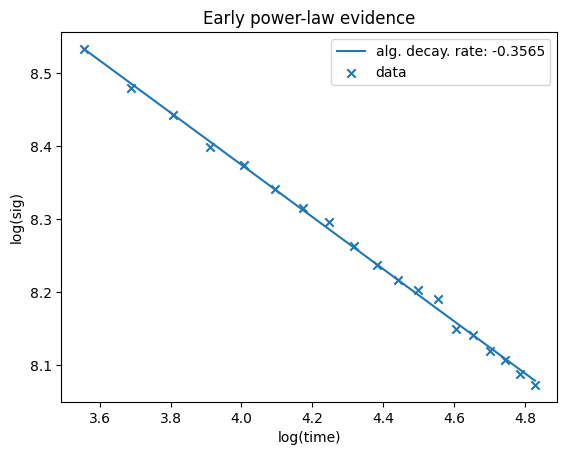

In [6]:
diff_test = nmr.Experiment(341, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

times = np.arange(5, 5 * 26, 5)

plt.scatter(times, diff_test)

plt.title("Ken-prepped short Int. Ham. Evo")

plt.xlabel("Diffusion time (us)")

plt.show()


x = np.log(times[6:])

y = np.log(diff_test)[6:]


pz = np.polyfit(x, y, 1)

plt.plot(x, x * pz[0] + pz[1], label=r"alg. decay. rate: {:0.4f}".format(pz[0]))

plt.scatter(x, y, label="data", marker="x")
plt.legend()

plt.xlabel("log(time)")

plt.ylabel("log(sig)")

plt.title("Early power-law evidence")

plt.show()

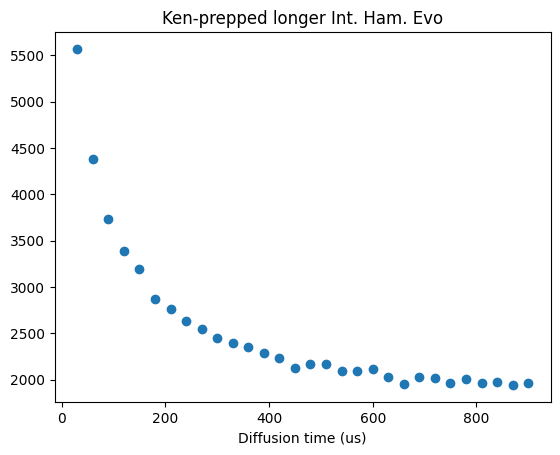

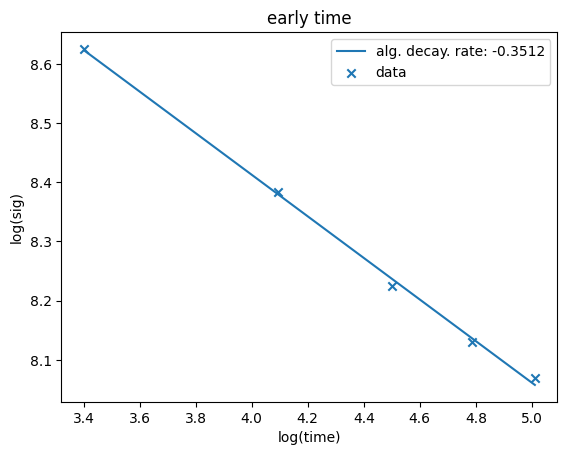

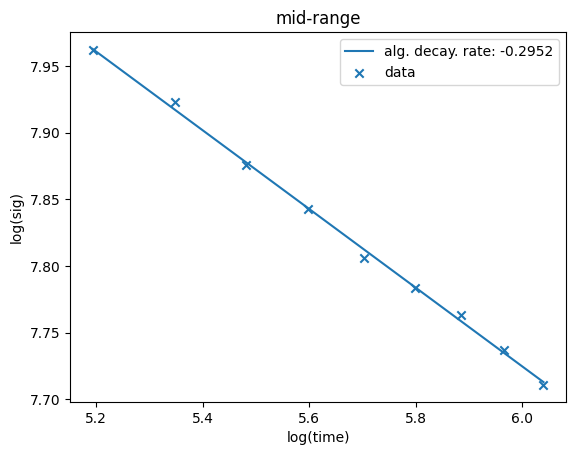

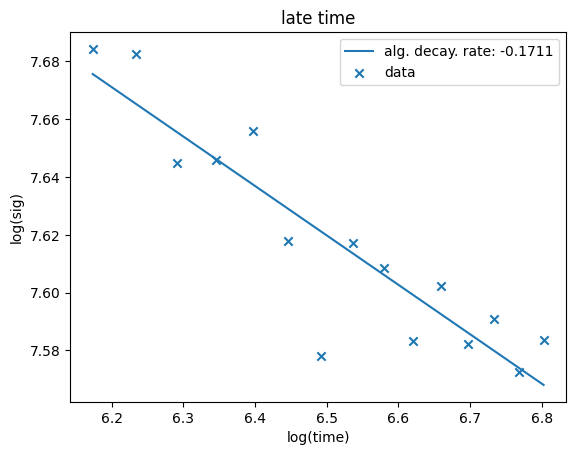

In [7]:
diff_test = nmr.Experiment(345, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

times = np.arange(30, 30 * 31, 30)


plt.scatter(times, diff_test)

plt.title("Ken-prepped longer Int. Ham. Evo")

plt.xlabel("Diffusion time (us)")

plt.show()


x = np.log(times[:5])

y = np.log(diff_test)[:5]

pz = np.polyfit(x, y, 1)

plt.plot(x, x * pz[0] + pz[1], label=r"alg. decay. rate: {:0.4f}".format(pz[0]))

plt.scatter(x, y, label="data", marker="x")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.title("early time")

plt.show()


x = np.log(times[5:14])

y = np.log(diff_test)[5:14]

pz = np.polyfit(x, y, 1)

plt.plot(x, x * pz[0] + pz[1], label=r"alg. decay. rate: {:0.4f}".format(pz[0]))

plt.scatter(x, y, label="data", marker="x")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")

plt.title("mid-range")

plt.show()


x = np.log(times[15:])

y = np.log(diff_test)[15:]

pz = np.polyfit(x, y, 1)

plt.plot(x, x * pz[0] + pz[1], label=r"alg. decay. rate: {:0.4f}".format(pz[0]))

plt.scatter(x, y, label="data", marker="x")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.title("late time")

plt.show()

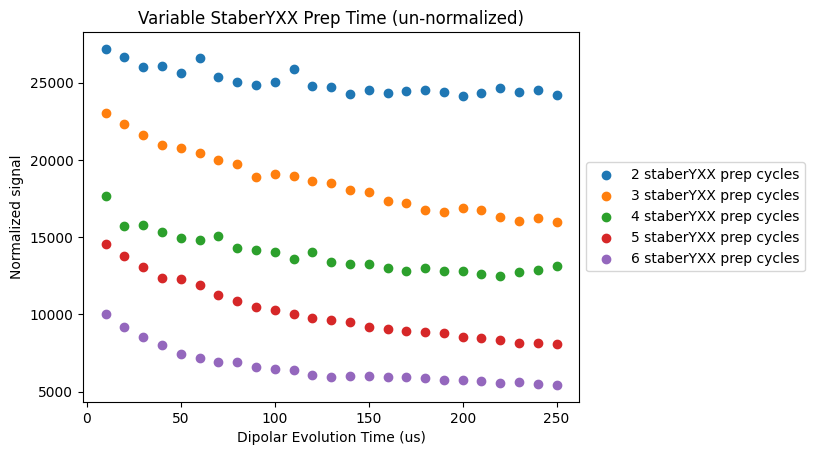

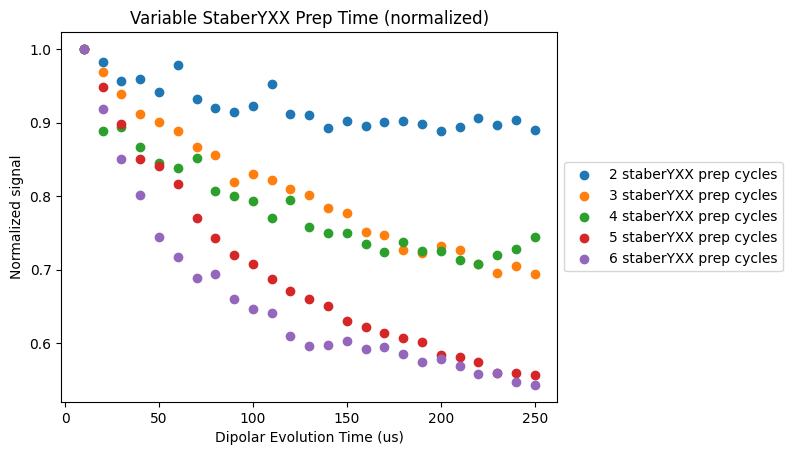

In [8]:
diffusion_varPrep = nmr.Experiment(364, folder="expt9").load_tpc3d(
    use_real=False, normalize=False
)

times = np.arange(10, 10 * 26, 10)

for idx, sig in enumerate(diffusion_varPrep):

    plt.scatter(times, sig, label=f"{2+idx} staberYXX prep cycles")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.xlabel("Dipolar Evolution Time (us)")

plt.ylabel("Normalized signal")

plt.title("Variable StaberYXX Prep Time (un-normalized)")

plt.show()


diffusion_varPrep_norm = nmr.Experiment(364, folder="expt9").load_tpc3d(
    use_real=False, normalize=True
)

for idx, sig in enumerate(diffusion_varPrep_norm):

    plt.scatter(times, sig, label=f"{2+idx} staberYXX prep cycles")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.xlabel("Dipolar Evolution Time (us)")

plt.ylabel("Normalized signal")

plt.title("Variable StaberYXX Prep Time (normalized)")

plt.show()

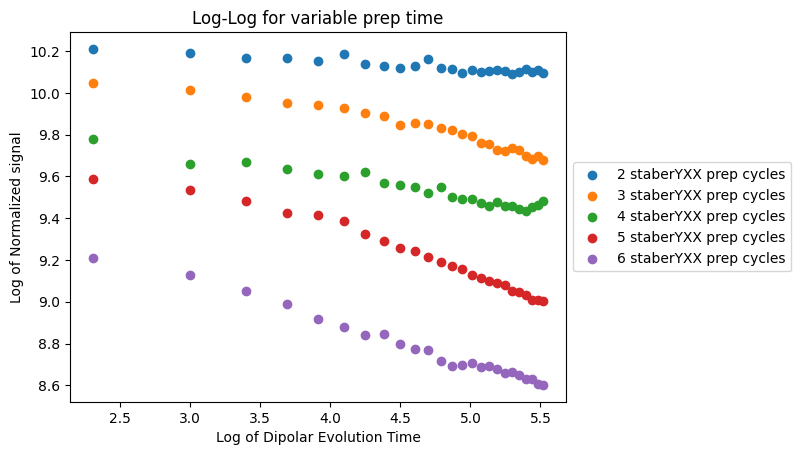

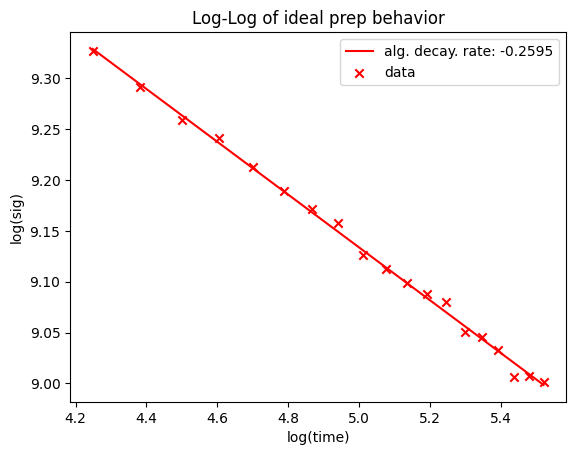

In [9]:
times = np.arange(10, 10 * 26, 10)
for idx, sig in enumerate(diffusion_varPrep):
    plt.scatter(np.log(times), np.log(sig), label=f"{2+idx} staberYXX prep cycles")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel("Log of Dipolar Evolution Time")
plt.ylabel("Log of Normalized signal")
plt.title("Log-Log for variable prep time")
plt.show()

diffusionRaw = diffusion_varPrep[3]
x = np.log(times[6:])
y = np.log(diffusionRaw[6:])
pz = np.polyfit(x, y, 1)
plt.plot(
    x, x * pz[0] + pz[1], label=r"alg. decay. rate: {:0.4f}".format(pz[0]), color="red"
)
plt.scatter(x, y, label="data", marker="x", color="red")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.title("Log-Log of ideal prep behavior")
plt.show()

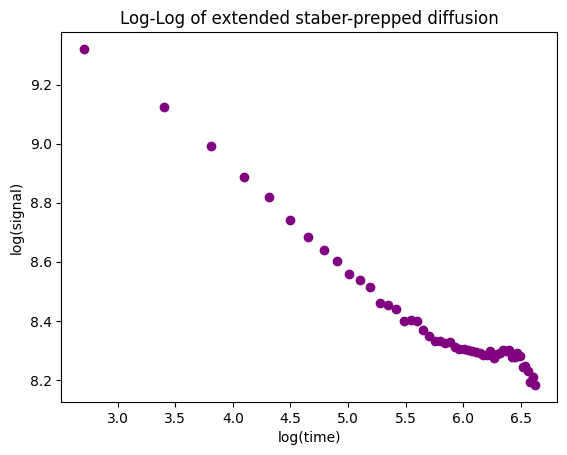

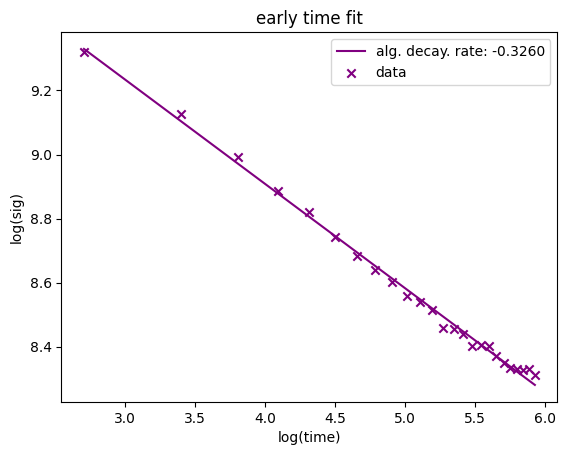

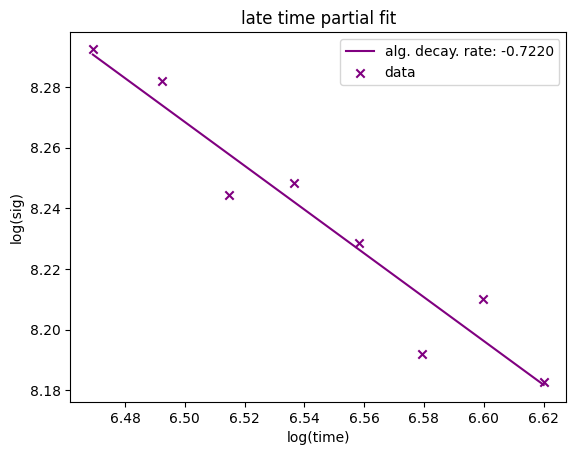

In [10]:
diff_yxx = nmr.Experiment(383, folder="expt9").load_tpc(use_real=False, normalize=False)
times = np.arange(15, 15 * len(diff_yxx) + 15, 15)
plt.scatter(np.log(times), np.log(diff_yxx), color="purple")
plt.title("Log-Log of extended staber-prepped diffusion")
plt.xlabel("log(time)")
plt.ylabel("log(signal)")
plt.show()

x = np.log(times[:25])
y = np.log(diff_yxx[:25])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"alg. decay. rate: {:0.4f}".format(pz[0]),
    color="purple",
)
plt.scatter(x, y, label="data", marker="x", color="purple")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.title("early time fit")
plt.show()

x = np.log(times[42:])
y = np.log(diff_yxx[42:])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"alg. decay. rate: {:0.4f}".format(pz[0]),
    color="purple",
)
plt.scatter(x, y, label="data", marker="x", color="purple")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.title("late time partial fit")
plt.show()

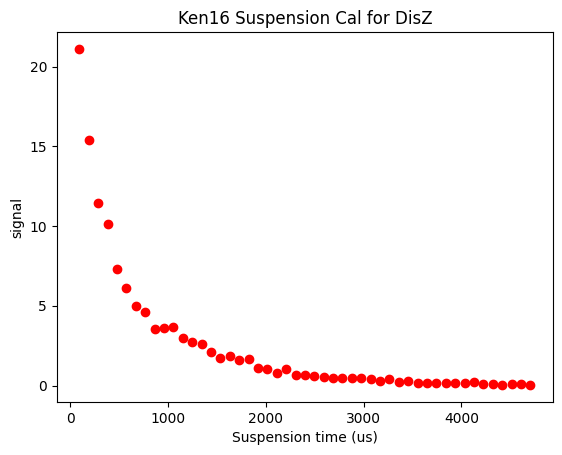

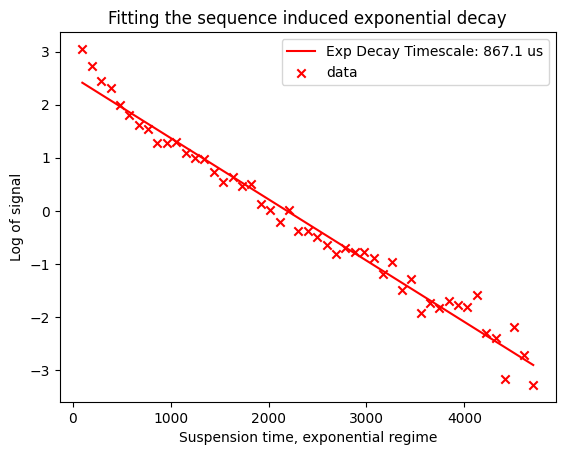

In [11]:
disZ_ken_susp = nmr.Experiment(391, folder="expt9").load_tpc(use_real=False)
times = np.arange(4 * 24, 50 * 4 * 24, 4 * 24)
plt.scatter(times, disZ_ken_susp[1:], color="red")
plt.xlabel("Suspension time (us)")
plt.ylabel("signal")
plt.title("Ken16 Suspension Cal for DisZ")
plt.show()

cut = 0
x = times[cut:]
y = np.log(disZ_ken_susp[cut + 1 :])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"Exp Decay Timescale: {:0.1f} us".format(-1 / pz[0]),
    color="red",
)
plt.scatter(x, y, label="data", marker="x", color="red")
plt.legend()
plt.xlabel("Suspension time, exponential regime")
plt.ylabel("Log of signal")
plt.title("Fitting the sequence induced exponential decay")
plt.show()

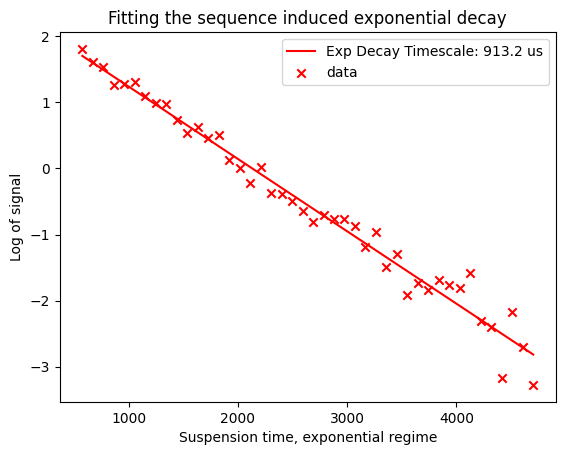

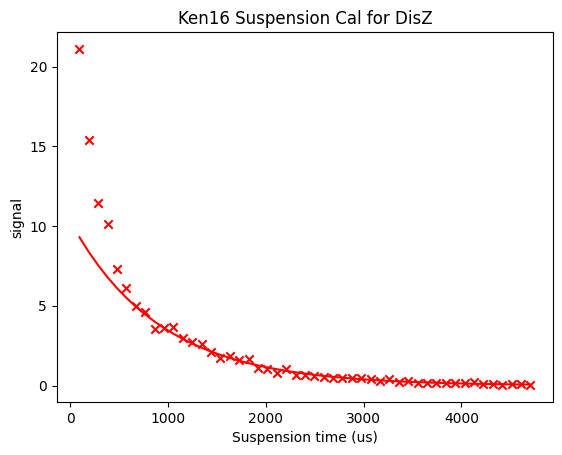

In [12]:
disZ_ken_susp = nmr.Experiment(391, folder="expt9").load_tpc(use_real=False)


cut = 5
x = times[cut:]
y = np.log(disZ_ken_susp[cut + 1 :])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"Exp Decay Timescale: {:0.1f} us".format(-1 / pz[0]),
    color="red",
)
plt.scatter(x, y, label="data", marker="x", color="red")
plt.legend()
plt.xlabel("Suspension time, exponential regime")
plt.ylabel("Log of signal")
plt.title("Fitting the sequence induced exponential decay")
plt.show()


times = np.arange(4 * 24, 50 * 4 * 24, 4 * 24)
plt.scatter(times, disZ_ken_susp[1:], color="red", marker="x")
plt.plot(times, np.exp(pz[1]) * np.exp((times) * pz[0]), color="red")
plt.xlabel("Suspension time (us)")
plt.ylabel("signal")
plt.title("Ken16 Suspension Cal for DisZ")
plt.show()


decay_correction = np.exp(-times * pz[0])

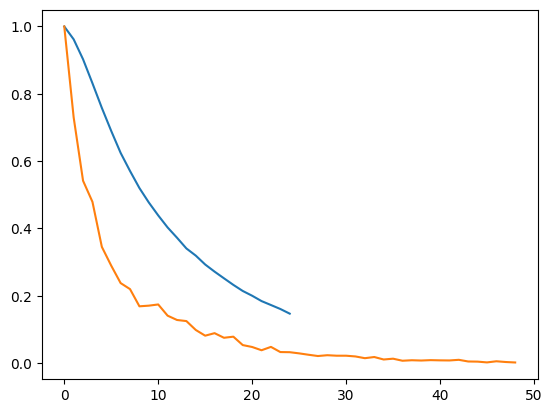

In [13]:
ken16_susp_fc = nmr.Experiment(279, folder="expt9").load_tpc(
    use_real=False, normalize=True
)

disZ_ken_susp = nmr.Experiment(391, folder="expt9").load_tpc(use_real=False)

times = np.arange(4 * 24, 50 * 4 * 24, 4 * 24)


plt.plot(ken16_susp_fc)

plt.plot(disZ_ken_susp[1:] / disZ_ken_susp[1])

plt.show()

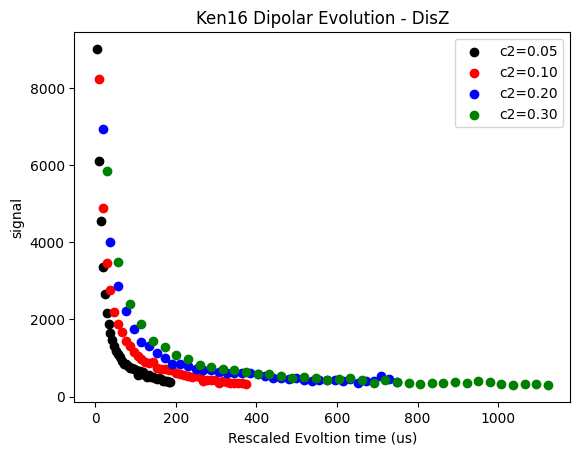

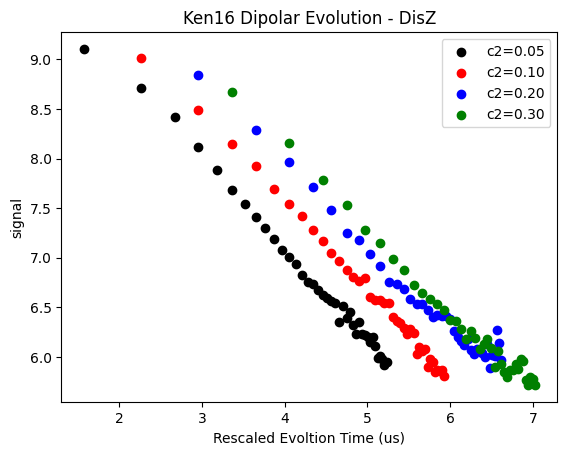

In [14]:
disZ_c2_10 = nmr.Experiment(392, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

disZ_c2_20 = nmr.Experiment(393, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

disZ_c2_30 = nmr.Experiment(394, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

disZ_c2_05 = nmr.Experiment(424, folder="expt9").load_tpc(
    use_real=False, normalize=False
)


times = np.arange(4 * 24, 40 * 4 * 24, 4 * 24)

plt.scatter(0.05 * times, disZ_c2_05[1:40], color="black", label="c2=0.05")

plt.scatter(0.1 * times, disZ_c2_10[1:], color="red", label="c2=0.10")

plt.scatter(0.2 * times, disZ_c2_20[1:], color="blue", label="c2=0.20")

plt.scatter(0.3 * times, disZ_c2_30[1:], color="green", label="c2=0.30")

plt.xlabel("Rescaled Evoltion time (us)")

plt.ylabel("signal")

plt.title("Ken16 Dipolar Evolution - DisZ")
plt.legend()

plt.show()


plt.scatter(
    np.log(0.05 * times), np.log(disZ_c2_05[1:40]), color="black", label="c2=0.05"
)

plt.scatter(np.log(0.1 * times), np.log(disZ_c2_10[1:]), color="red", label="c2=0.10")

plt.scatter(np.log(0.2 * times), np.log(disZ_c2_20[1:]), color="blue", label="c2=0.20")

plt.scatter(np.log(0.3 * times), np.log(disZ_c2_30[1:]), color="green", label="c2=0.30")

plt.xlabel("Rescaled Evoltion Time (us)")

plt.ylabel("signal")

plt.title("Ken16 Dipolar Evolution - DisZ")
plt.legend()

plt.show()

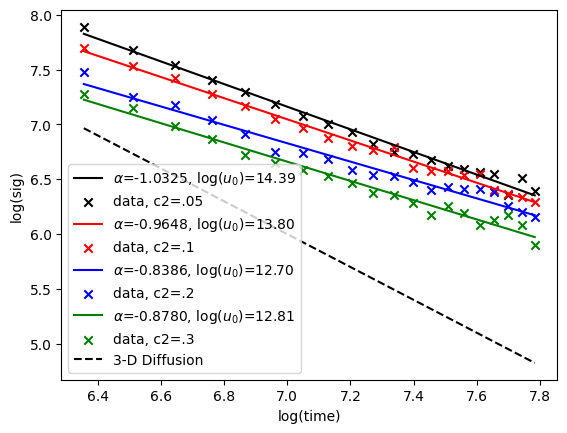

In [15]:
start = 5
end = 25

x = np.log(times[start:end])
y = np.log(disZ_c2_05[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="black",
)
plt.scatter(x, y, label="data, c2=.05", marker="x", color="black")

x = np.log(times[start:end])
y = np.log(disZ_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="red",
)
plt.scatter(x, y, label="data, c2=.1", marker="x", color="red")

x = np.log(times[start:end])
y = np.log(disZ_c2_20[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="blue",
)
plt.scatter(x, y, label="data, c2=.2", marker="x", color="blue")

x = np.log(times[start:end])
y = np.log(disZ_c2_30[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="green",
)
plt.scatter(x, y, label="data, c2=.3", marker="x", color="green")

plt.plot(x, -3 / 2 * x + 16.5, label="3-D Diffusion", color="black", linestyle="--")

plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

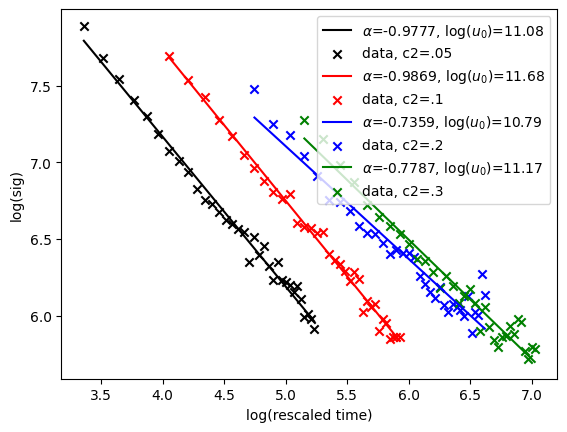

In [16]:
start = 5
end = 39

x = np.log(0.05 * times[start:end])
y = np.log(disZ_c2_05[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="black",
)
plt.scatter(x, y, label="data, c2=.05", marker="x", color="black")

x = np.log(0.1 * times[start:end])
y = np.log(disZ_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="red",
)
plt.scatter(x, y, label="data, c2=.1", marker="x", color="red")

x = np.log(0.2 * times[start:end])
y = np.log(disZ_c2_20[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="blue",
)
plt.scatter(x, y, label="data, c2=.2", marker="x", color="blue")

x = np.log(0.3 * times[start:end])
y = np.log(disZ_c2_30[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="green",
)
plt.scatter(x, y, label="data, c2=.3", marker="x", color="green")

plt.legend()
plt.xlabel("log(rescaled time)")
plt.ylabel("log(sig)")
plt.show()

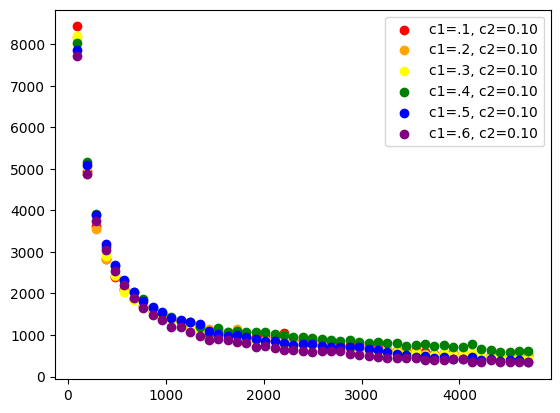

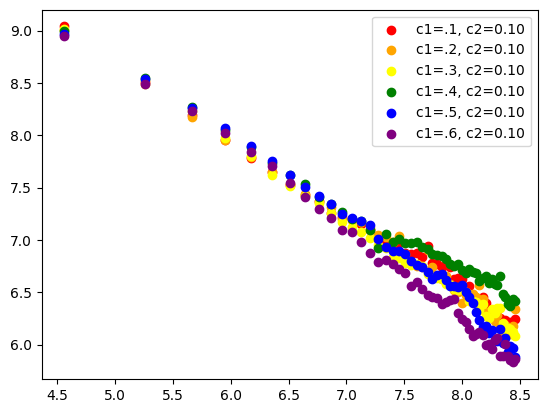

In [17]:
disZ_c1_10_c2_10 = nmr.Experiment(401, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

disZ_c1_20_c2_10 = nmr.Experiment(402, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

disZ_c1_30_c2_10 = nmr.Experiment(408, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

disZ_c1_40_c2_10 = nmr.Experiment(409, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

disZ_c1_50_c2_10 = nmr.Experiment(410, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

disZ_c1_60_c2_10 = nmr.Experiment(411, folder="expt9").load_tpc(
    use_real=False, normalize=False
)


tau = 4

T = 24 * tau


times = np.arange(T, 50 * T, T)

plt.scatter(times, disZ_c1_10_c2_10[1:], color="red", label="c1=.1, c2=0.10")

plt.scatter(times, disZ_c1_20_c2_10[1:], color="orange", label="c1=.2, c2=0.10")

plt.scatter(times, disZ_c1_30_c2_10[1:], color="yellow", label="c1=.3, c2=0.10")

plt.scatter(times, disZ_c1_40_c2_10[1:], color="green", label="c1=.4, c2=0.10")

plt.scatter(times, disZ_c1_50_c2_10[1:], color="blue", label="c1=.5, c2=0.10")

plt.scatter(times, disZ_c1_60_c2_10[1:], color="purple", label="c1=.6, c2=0.10")


plt.legend()

plt.show()


plt.scatter(
    np.log(times), np.log(disZ_c1_10_c2_10[1:]), color="red", label="c1=.1, c2=0.10"
)

plt.scatter(
    np.log(times), np.log(disZ_c1_20_c2_10[1:]), color="orange", label="c1=.2, c2=0.10"
)

plt.scatter(
    np.log(times), np.log(disZ_c1_30_c2_10[1:]), color="yellow", label="c1=.3, c2=0.10"
)

plt.scatter(
    np.log(times), np.log(disZ_c1_40_c2_10[1:]), color="green", label="c1=.4, c2=0.10"
)

plt.scatter(
    np.log(times), np.log(disZ_c1_50_c2_10[1:]), color="blue", label="c1=.5, c2=0.10"
)

plt.scatter(
    np.log(times), np.log(disZ_c1_60_c2_10[1:]), color="purple", label="c1=.6, c2=0.10"
)


plt.legend()

plt.show()

In [18]:
decay_power_list = []

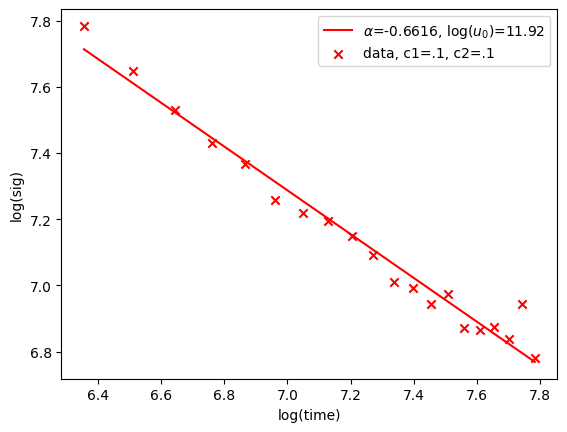

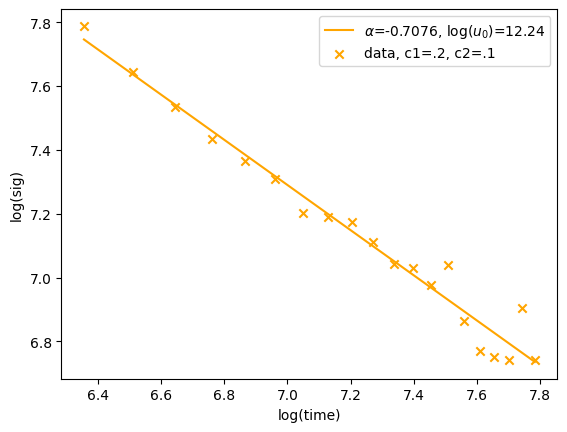

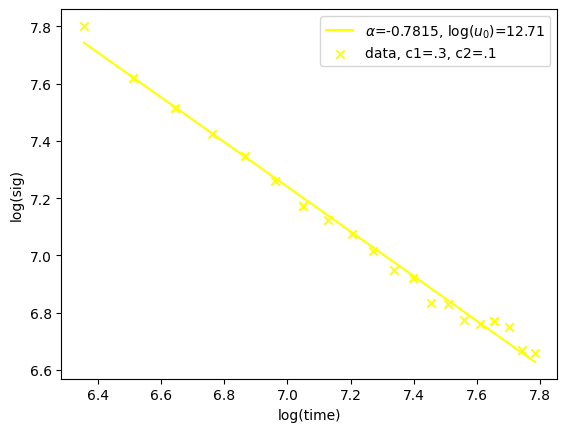

In [19]:
start = 5
end = 25


x = np.log(times[start:end])
y = np.log(disZ_c1_10_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="red",
)
plt.scatter(x, y, label="data, c1=.1, c2=.1", marker="x", color="red")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()
decay_power_list.append([0.1, pz[0]])

x = np.log(times[start:end])
y = np.log(disZ_c1_20_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="orange",
)
plt.scatter(x, y, label="data, c1=.2, c2=.1", marker="x", color="orange")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()
decay_power_list.append([0.2, pz[0]])

x = np.log(times[start:end])
y = np.log(disZ_c1_30_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="yellow",
)
plt.scatter(x, y, label="data, c1=.3, c2=.1", marker="x", color="yellow")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()
decay_power_list.append([0.3, pz[0]])

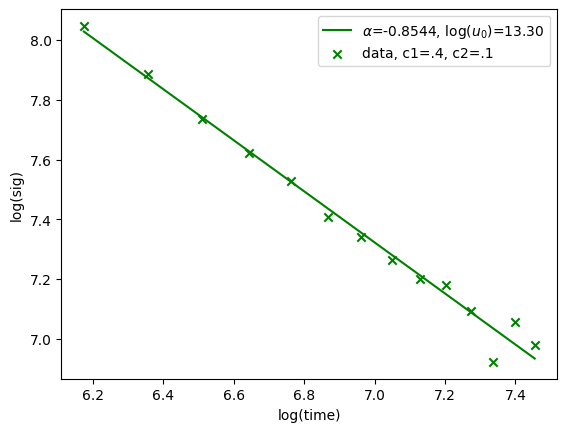

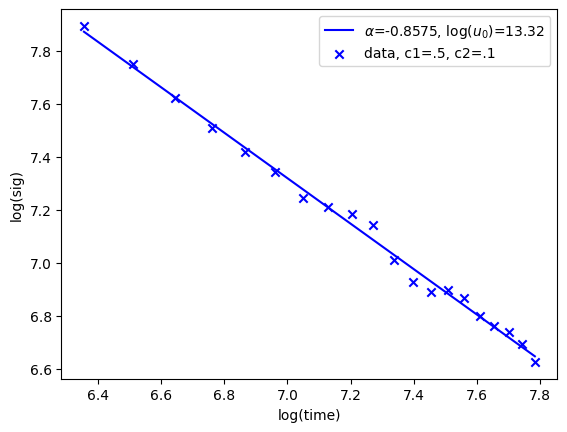

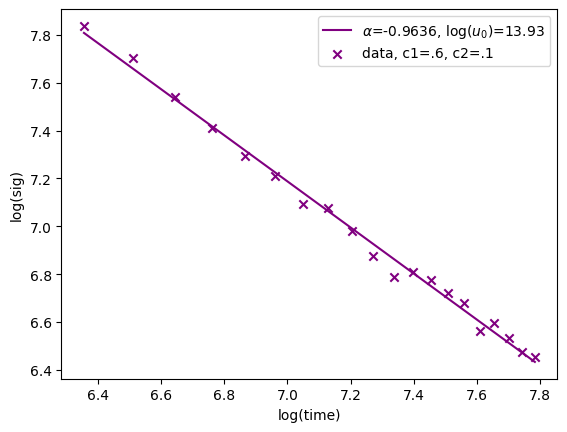

In [20]:
start = 4
end = 18

x = np.log(times[start:end])
y = np.log(disZ_c1_40_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="green",
)
plt.scatter(x, y, label="data, c1=.4, c2=.1", marker="x", color="green")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()
decay_power_list.append([0.4, pz[0]])

start = 5
end = 25

x = np.log(times[start:end])
y = np.log(disZ_c1_50_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="blue",
)
plt.scatter(x, y, label="data, c1=.5, c2=.1", marker="x", color="blue")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()
decay_power_list.append([0.5, pz[0]])

x = np.log(times[start:end])
y = np.log(disZ_c1_60_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="purple",
)
plt.scatter(x, y, label="data, c1=.6, c2=.1", marker="x", color="purple")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()
decay_power_list.append([0.6, pz[0]])

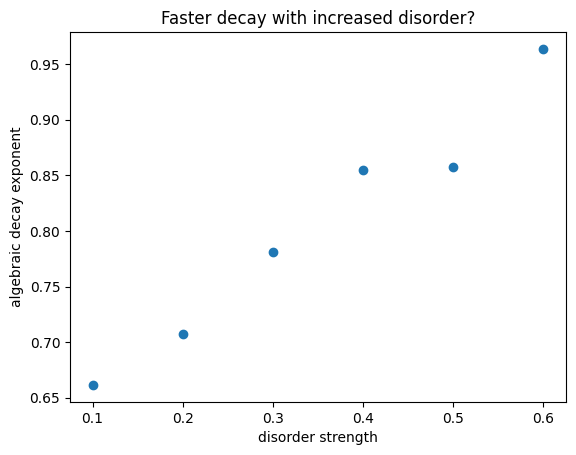

In [21]:
vals = np.array(decay_power_list).transpose()
plt.scatter(vals[0], -1 * vals[1])
plt.xlabel("disorder strength")
plt.ylabel("algebraic decay exponent")
plt.title("Faster decay with increased disorder?")
plt.show()

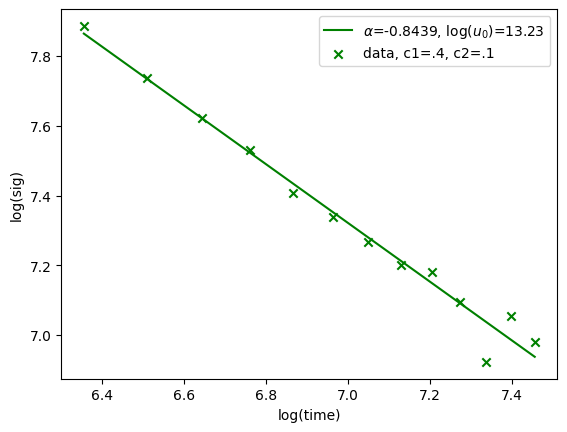

In [22]:
start = 5
end = 18


x = np.log(times[start:end])
y = np.log(disZ_c1_40_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="green",
)
plt.scatter(x, y, label="data, c1=.4, c2=.1", marker="x", color="green")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

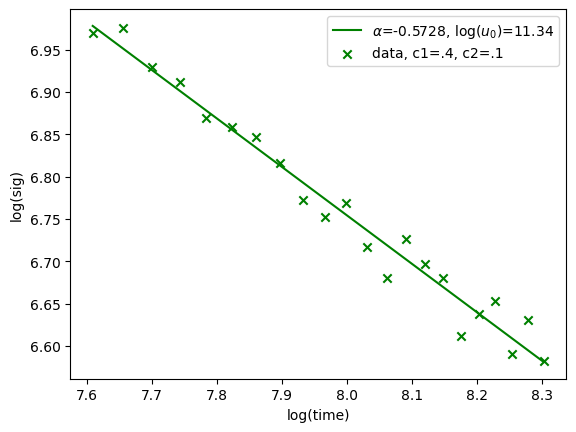

In [23]:
start = 20
end = 42


x = np.log(times[start:end])
y = np.log(disZ_c1_40_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="green",
)
plt.scatter(x, y, label="data, c1=.4, c2=.1", marker="x", color="green")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

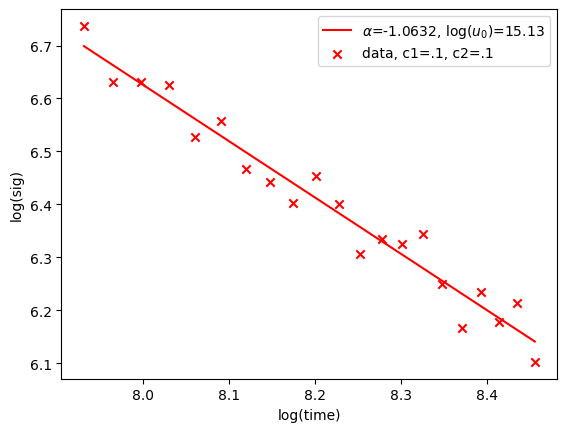

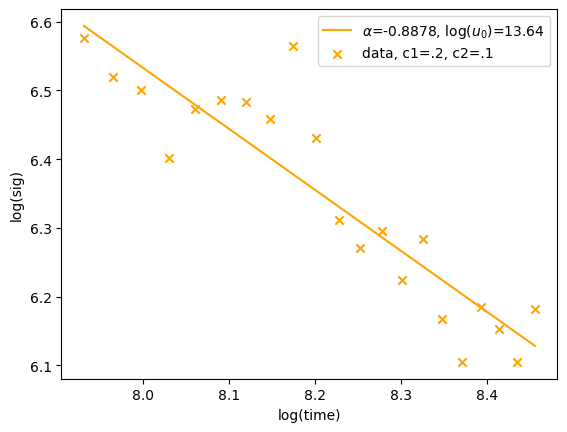

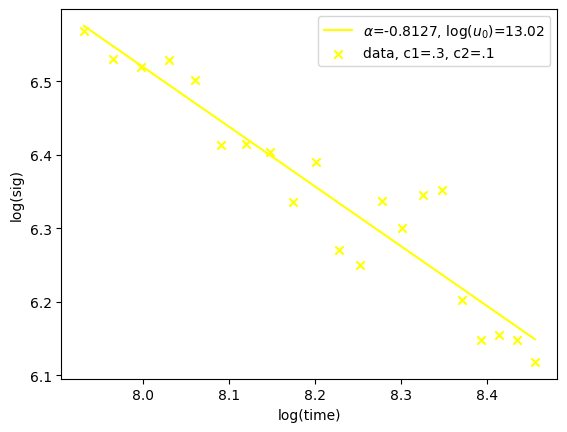

In [24]:
start = 28
end = 49

x = np.log(times[start:end])
y = np.log(disZ_c1_10_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="red",
)
plt.scatter(x, y, label="data, c1=.1, c2=.1", marker="x", color="red")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

x = np.log(times[start:end])
y = np.log(disZ_c1_20_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="orange",
)
plt.scatter(x, y, label="data, c1=.2, c2=.1", marker="x", color="orange")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

x = np.log(times[start:end])
y = np.log(disZ_c1_30_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="yellow",
)
plt.scatter(x, y, label="data, c1=.3, c2=.1", marker="x", color="yellow")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

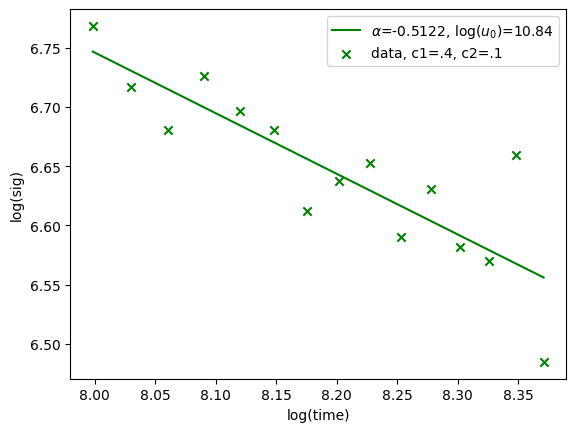

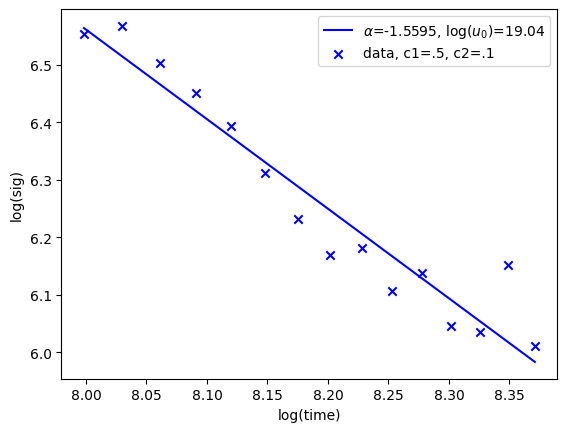

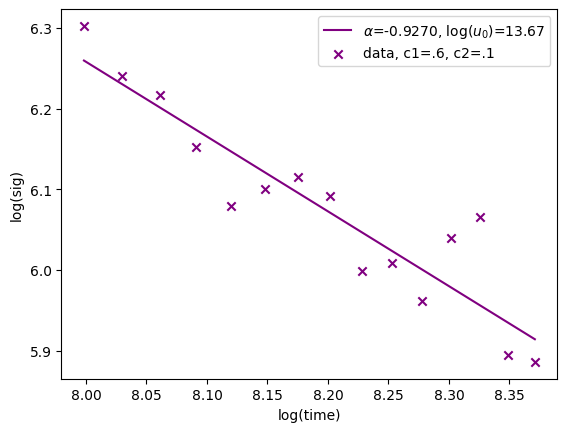

In [25]:
start = 30
end = 45

x = np.log(times[start:end])
y = np.log(disZ_c1_40_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="green",
)
plt.scatter(x, y, label="data, c1=.4, c2=.1", marker="x", color="green")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

x = np.log(times[start:end])
y = np.log(disZ_c1_50_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="blue",
)
plt.scatter(x, y, label="data, c1=.5, c2=.1", marker="x", color="blue")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

x = np.log(times[start:end])
y = np.log(disZ_c1_60_c2_10[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="purple",
)
plt.scatter(x, y, label="data, c1=.6, c2=.1", marker="x", color="purple")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

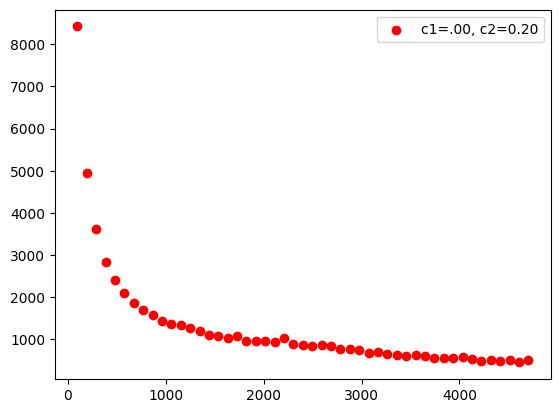

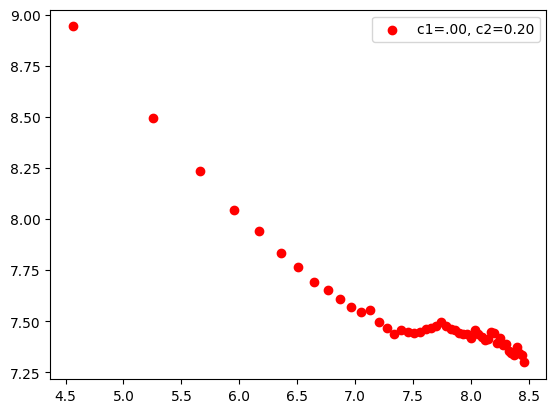

In [26]:
disZ_c1_00_c2_20 = nmr.Experiment(417, folder="expt9").load_tpc(
    use_real=False, normalize=False
)


tau = 4

T = 24 * tau


times = np.arange(T, 50 * T, T)

plt.scatter(times, disZ_c1_10_c2_10[1:], color="red", label="c1=.00, c2=0.20")

# plt.scatter(times,disZ_c1_20_c2_10[1:],color="orange",label="c1=.2, c2=0.10")

# plt.scatter(times,disZ_c1_30_c2_10[1:],color="yellow",label="c1=.3, c2=0.10")

# plt.scatter(times,disZ_c1_40_c2_10[1:],color="green",label="c1=.4, c2=0.10")

# plt.scatter(times,disZ_c1_50_c2_10[1:],color="blue",label="c1=.5, c2=0.10")

# plt.scatter(times,disZ_c1_60_c2_10[1:],color="purple",label="c1=.6, c2=0.10")

plt.legend()

plt.show()


plt.scatter(
    np.log(times), np.log(disZ_c1_00_c2_20[1:]), color="red", label="c1=.00, c2=0.20"
)

# plt.scatter(np.log(times),np.log(disZ_c1_20_c2_10[1:]),color="orange",label="c1=.2, c2=0.10")

# plt.scatter(np.log(times),np.log(disZ_c1_30_c2_10[1:]),color="yellow",label="c1=.3, c2=0.10")

# plt.scatter(np.log(times),np.log(disZ_c1_40_c2_10[1:]),color="green",label="c1=.4, c2=0.10")

# plt.scatter(np.log(times),np.log(disZ_c1_50_c2_10[1:]),color="blue",label="c1=.5, c2=0.10")

# plt.scatter(np.log(times),np.log(disZ_c1_60_c2_10[1:]),color="purple",label="c1=.6, c2=0.10")

plt.legend()

plt.show()

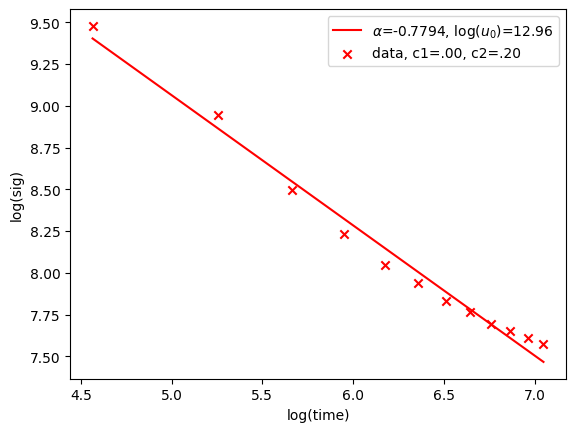

In [27]:
start = 0
end = 12


x = np.log(times[start:end])
y = np.log(disZ_c1_00_c2_20[start:end])
pz = np.polyfit(x, y, 1)
plt.plot(
    x,
    x * pz[0] + pz[1],
    label=r"$\alpha$={:0.4f}, log$(u_0)$={:0.2f}".format(pz[0], pz[1]),
    color="red",
)
plt.scatter(x, y, label="data, c1=.00, c2=.20", marker="x", color="red")
plt.legend()
plt.xlabel("log(time)")
plt.ylabel("log(sig)")
plt.show()

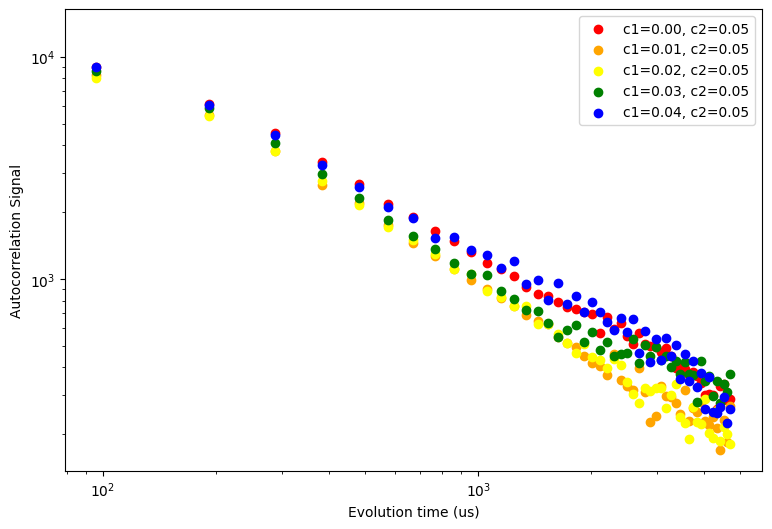

In [28]:
disZ_c2_05 = nmr.Experiment(424, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
disZ_c2_05_c1_01 = nmr.Experiment(427, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
disZ_c2_05_c1_02 = nmr.Experiment(428, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
disZ_c2_05_c1_03 = nmr.Experiment(435, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
disZ_c2_05_c1_04 = nmr.Experiment(436, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
disZ_c2_05_c1_05 = nmr.Experiment(437, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
disZ_c2_05_c1_06 = nmr.Experiment(438, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
disZ_c2_05_c1_07 = nmr.Experiment(444, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
disZ_c2_05_c1_30 = nmr.Experiment(451, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
disZ_c2_05_c1_60 = nmr.Experiment(452, folder="expt9").load_tpc(
    use_real=False, normalize=False
)


data = {}
data[0 / 0.05] = nmr.Experiment(424, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
data[0.01 / 0.05] = nmr.Experiment(427, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
data[0.02 / 0.05] = nmr.Experiment(428, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
data[0.03 / 0.05] = nmr.Experiment(435, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
data[0.04 / 0.05] = nmr.Experiment(436, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
data[0.04001 / 0.05] = nmr.Experiment(453, folder="expt9").load_tpc(
    use_real=False, normalize=False
)
data[0.05 / 0.05] = nmr.Experiment(437, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

data[0.06 / 0.05] = nmr.Experiment(438, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

data[0.07 / 0.05] = nmr.Experiment(444, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

data[0.30 / 0.05] = nmr.Experiment(451, folder="expt9").load_tpc(
    use_real=False, normalize=False
)

# data[np.sqrt(0.60)/.05] =  nmr.Experiment(452,folder='expt9').load_tpc(use_real=False,normalize=False)


tau = 4

T = 24 * tau


times = np.arange(0, 50 * T, T)


fig, ax = plt.subplots(figsize=(9, 6))

ax.set_xscale("log")

ax.set_yscale("log")

ax.scatter(times, disZ_c2_05, color="red", label="c1=0.00, c2=0.05")

ax.scatter(times, disZ_c2_05_c1_01, color="orange", label="c1=0.01, c2=0.05")

ax.scatter(times, disZ_c2_05_c1_02, color="yellow", label="c1=0.02, c2=0.05")

ax.scatter(times, disZ_c2_05_c1_03, color="green", label="c1=0.03, c2=0.05")

ax.scatter(times, disZ_c2_05_c1_04, color="blue", label="c1=0.04, c2=0.05")

# ax.scatter(times,disZ_c2_05_c1_05,color="black",label="c1=0.05, c2=0.05")

plt.xlabel("Evolution time (us)")

plt.ylabel("Autocorrelation Signal")

plt.legend()

plt.show()

In [29]:
data_pub = nmr.Experiment(543, folder="expt9").load_tpc3d(
    use_real=False, normalize=False
)

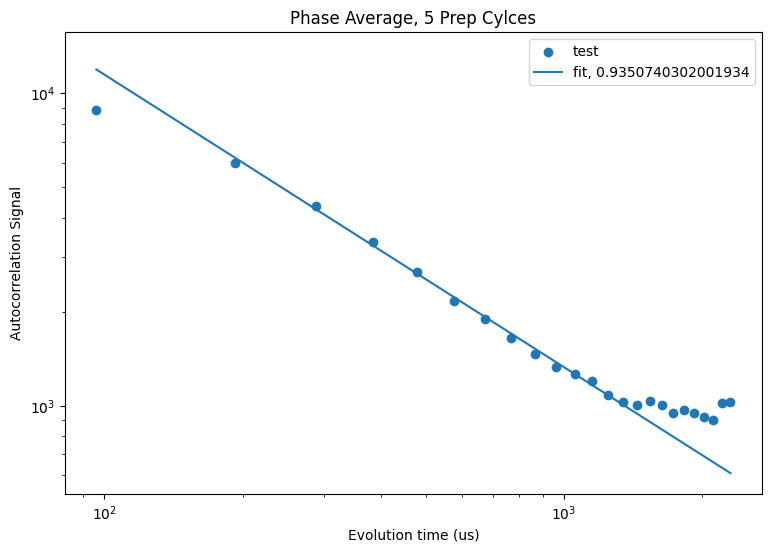

In [30]:
start = 2
end = 14
x = np.log(times[start:end])
X = sm.add_constant(x)
y = -np.log(data_pub[start:end].sum(axis=1) / 4)
ols = sm.OLS(y, X)
ols_result = ols.fit()
slopes = ols_result.params[1]
err = ols_result.conf_int()[1, 1] - ols_result.params[1]


fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(times[0:25], data_pub.sum(axis=1) / 4, label="test")
ax.plot(
    times[1:25],
    0.85 * 1e6 * times[1:25] ** (-ols_result.params[1]),
    label=f"fit, {ols_result.params[1]}",
)
plt.xlabel("Evolution time (us)")
plt.title("Phase Average, 5 Prep Cylces")
plt.ylabel("Autocorrelation Signal")
plt.legend()
plt.show()

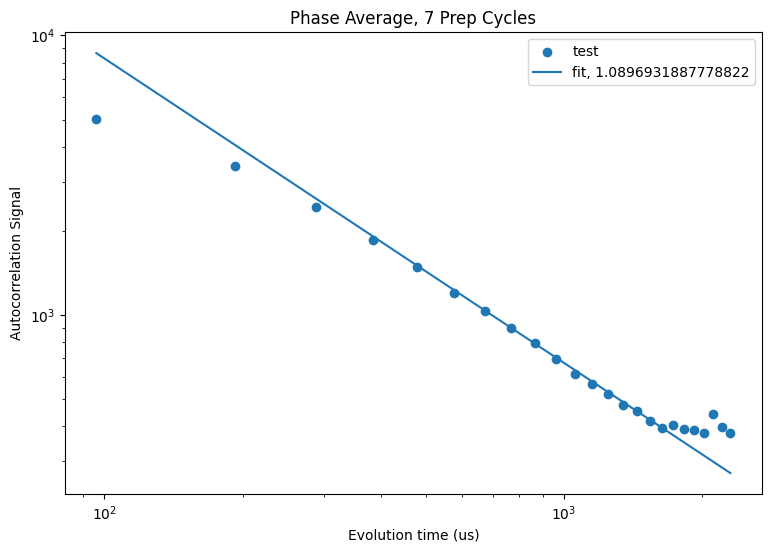

In [31]:
data_pub_1 = nmr.Experiment(551, folder="expt9").load_tpc3d(
    use_real=False, normalize=False
)


start = 5

end = 18

x = np.log(times[start:end])

X = sm.add_constant(x)

y = -np.log(data_pub_1[start:end].sum(axis=1) / 4)

ols = sm.OLS(y, X)

ols_result = ols.fit()
slopes = ols_result.params[1]

err = ols_result.conf_int()[1, 1] - ols_result.params[1]


fig, ax = plt.subplots(figsize=(9, 6))

ax.set_xscale("log")

ax.set_yscale("log")

ax.scatter(times[0:25], data_pub_1.sum(axis=1) / 4, label="test")

ax.plot(
    times[1:25],
    1.25 * 1e6 * times[1:25] ** (-ols_result.params[1]),
    label=f"fit, {ols_result.params[1]}",
)

plt.xlabel("Evolution time (us)")

plt.title("Phase Average, 7 Prep Cycles")

plt.ylabel("Autocorrelation Signal")
plt.legend()

plt.show()

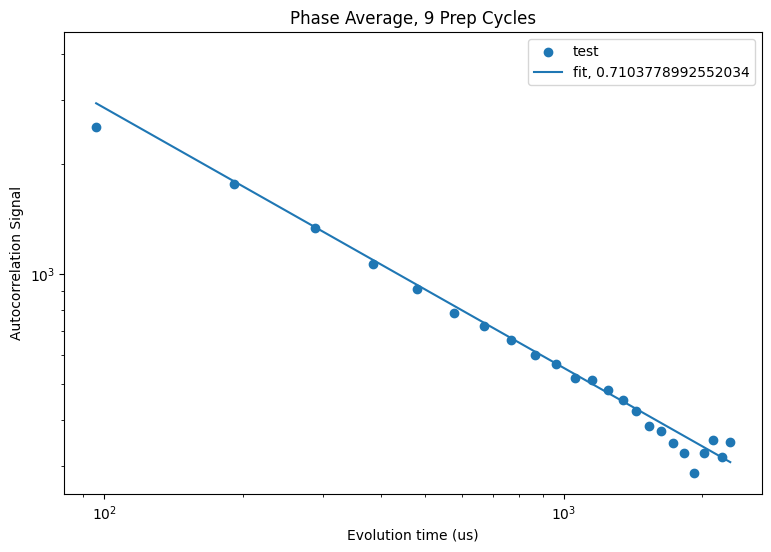

In [32]:
data_pub_2 = nmr.Experiment(556, folder="expt9").load_tpc3d(
    use_real=False, normalize=False
)


start = 2

end = 18

x = np.log(times[start:end])

X = sm.add_constant(x)

y = -np.log(data_pub_2[start:end].sum(axis=1) / 4)

ols = sm.OLS(y, X)

ols_result = ols.fit()
slopes = ols_result.params[1]

err = ols_result.conf_int()[1, 1] - ols_result.params[1]


fig, ax = plt.subplots(figsize=(9, 6))

ax.set_xscale("log")

ax.set_yscale("log")

ax.scatter(times[0:25], data_pub_2.sum(axis=1) / 4, label="test")

ax.plot(
    times[1:25],
    0.75 * 1e5 * times[1:25] ** (-ols_result.params[1]),
    label=f"fit, {ols_result.params[1]}",
)

plt.xlabel("Evolution time (us)")

plt.title("Phase Average, 9 Prep Cycles")

plt.ylabel("Autocorrelation Signal")
plt.legend()

plt.show()

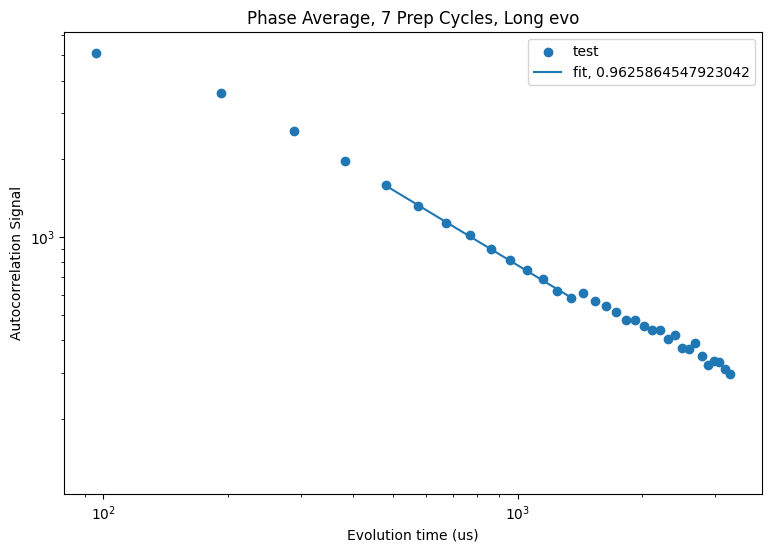

In [33]:
data_pub_3 = nmr.Experiment(572, folder="expt9").load_tpc3d(
    use_real=False, normalize=False
)


start = 5

end = 15

x = np.log(times[start:end])

X = sm.add_constant(x)

y = -np.log(data_pub_3[start:end].sum(axis=1) / 4)

ols = sm.OLS(y, X)

ols_result = ols.fit()

slopes = ols_result.params[1]

err = ols_result.conf_int()[1, 1] - ols_result.params[1]


fig, ax = plt.subplots(figsize=(9, 6))

ax.set_xscale("log")

ax.set_yscale("log")

ax.scatter(times[0:35], data_pub_3.sum(axis=1) / 4, label="test")

ax.plot(
    times[start:end],
    np.exp(-ols_result.params[0]) * times[start:end] ** (-ols_result.params[1]),
    label=f"fit, {ols_result.params[1]}",
)

plt.xlabel("Evolution time (us)")

plt.title("Phase Average, 7 Prep Cycles, Long evo")

plt.ylabel("Autocorrelation Signal")
plt.legend()

plt.show()

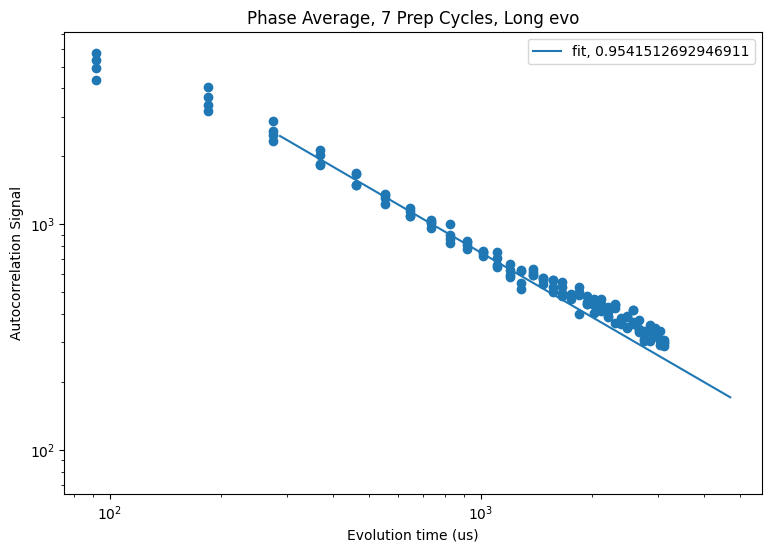

In [34]:
t_list = lambda start, end: [92 * t for t in range(start, end) for _ in range(4)]

start = 3
end = 12
x = np.log(t_list(start, end))
X = sm.add_constant(x)
y = -np.log(data_pub_3[start:end].flatten())
ols = sm.OLS(y, X)
ols_result = ols.fit()
slopes = ols_result.params[1]
err = ols_result.conf_int()[1, 1] - ols_result.params[1]

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(t_list(0, 35), data_pub_3.flatten())
ax.plot(
    times[start:],
    np.exp(-ols_result.params[0]) * times[start:] ** (-ols_result.params[1]),
    label=f"fit, {ols_result.params[1]}",
)
plt.xlabel("Evolution time (us)")
plt.title("Phase Average, 7 Prep Cycles, Long evo")
plt.ylabel("Autocorrelation Signal")
plt.legend()
plt.show()

In [35]:
def slope_fit(data, start, end):
    if end > 35:
        return 0
    x = np.log(t_list(start, end))
    X = sm.add_constant(x)
    y = -np.log(data[start:end].flatten())
    ols = sm.OLS(y, X)
    ols_result = ols.fit()
    slopes = ols_result.params[1]
    err = ols_result.conf_int()[1, 1] - ols_result.params[1]
    return slopes if slopes > 0 else 0

In [36]:
slope_fit(data_pub_3, 3, 15)

np.float64(0.9616807636990096)

In [37]:
slope_2d = [
    [slope_fit(data_pub_3, t0, t0 + dt) for dt in range(2, 34)] for t0 in range(1, 35)
]

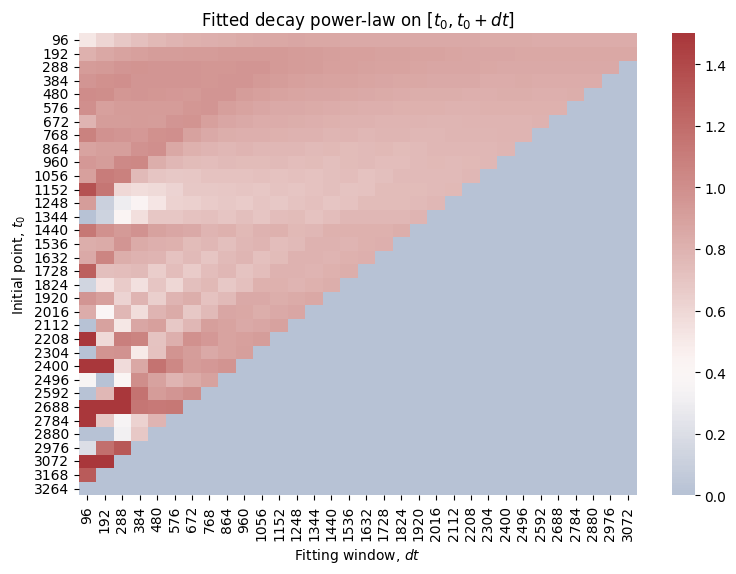

In [38]:
# Create the heatmap
plt.figure(figsize=(9, 6))
test = sns.heatmap(
    slope_2d,
    cmap="vlag",
    vmin=0,
    vmax=1.5,
    center=0.4,
    xticklabels=times[1:33],
    yticklabels=times[1:35],
)
# Display the plot

plt.title(r"Fitted decay power-law on $[t_0, t_0+dt]$")
plt.ylabel(r"Initial point, $t_0$")
plt.xlabel(r"Fitting window, $dt$")

plt.show()

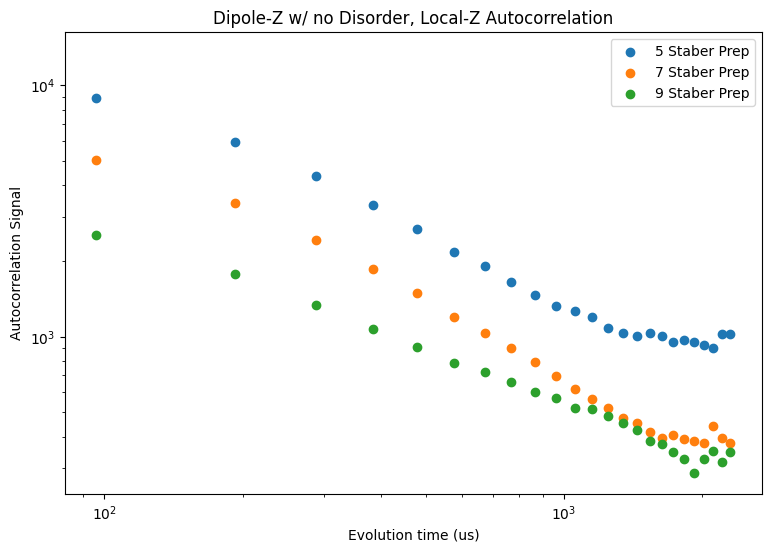

In [39]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(times[0:25], data_pub.sum(axis=1) / 4, label="5 Staber Prep")
ax.scatter(times[0:25], data_pub_1.sum(axis=1) / 4, label="7 Staber Prep")
#
ax.scatter(times[0:25], data_pub_2.sum(axis=1) / 4, label="9 Staber Prep")
plt.xlabel("Evolution time (us)")
plt.title("Dipole-Z w/ no Disorder, Local-Z Autocorrelation")
plt.ylabel("Autocorrelation Signal")
plt.legend()
plt.show()

In [40]:
start = 2
end = 22
x = np.log(times[start:end])
X = sm.add_constant(x)
y = -np.log(data_pub_1[start:end].sum(axis=1) / 4)
ols = sm.OLS(y, X)
ols_result = ols.fit()
slopes = ols_result.params[1]
err = ols_result.conf_int()[1, 1] - ols_result.params[1]

In [41]:
25 - 7

18

In [42]:
expt_3d_c208 = nmr.Experiment(473, folder="expt9").load_tpc3d(
    use_real=False, normalize=False
)

data08 = {}

c1_vals = [0, 0.02, 0.04, 0.06, 0.07, 0.08, 0.09, 0.1]
c2 = 0.08

for c1, series in zip(c1_vals, expt_3d_c208):

    data08[c1 / c2] = series


expt_3d_c208pt2 = nmr.Experiment(486, folder="expt9").load_tpc3d(
    use_real=False, normalize=False
)

data08pt2 = {}

c1_vals = [0.9, 0.10, 0.11, 0.12, 0.13, 0.2, 0.3, 0.4]
c2 = 0.08

for c1, series in zip(c1_vals, expt_3d_c208pt2):

    data08pt2[c1 / c2] = series


expt_3d_c208pt3 = nmr.Experiment(496, folder="expt9").load_tpc3d(
    use_real=False, normalize=False
)
data08pt3 = {}
c1_vals = [0.07, 0.08, 0.09, 0.10, 0.11]
c2 = 0.08
for c1, series in zip(c1_vals, expt_3d_c208pt3):
    data08pt3[c1 / c2] = series

expt_3d_c208 = nmr.Experiment(478, folder="expt9").load_tpc3d(
    use_real=False, normalize=True
)

c1_vals = [0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.3, 0.4]
data08pt4 = {}
for c1, series in zip(c1_vals, expt_3d_c208):

    data08pt4[c1 / c2] = series

c:\Users\awsta\Documents\qeg-env\Lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')
C:\Users\awsta\Documents\qeg-dev\mit-phd\nmresearch\interface\experiment.py:242: RuntimeWarning: invalid value encountered in divide
  vals[idx] = expt / max(expt)


In [43]:
data08.update(data08pt2)
data08.update(data08pt3)

In [44]:
def slope_extraction(
    time, data, start, end, ylabel="Slope", xlabel="dependent var", labelstr="",offset=0.0
):
    slopes = []
    dependent = []
    errs = []
    for key, val in data.items():
        x = np.log(time[start:end])
        X = sm.add_constant(x)
        y = -np.log(val[start:end])
        ols = sm.OLS(y, X)
        ols_result = ols.fit()
        dependent.append(np.sqrt(key**2 + offset**2))
        slopes.append(ols_result.params[1])
        errs.append(ols_result.conf_int()[1, 1] - ols_result.params[1])
    # plt.scatter(dependent, slopes,label='Fit w/ 95% C.I. ' + labelstr)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Fitted Dynamical Exponent, Variable Disorder")
    plt.errorbar(
        dependent,
        slopes,
        yerr=errs,
        linestyle="",
        marker="o",
        label="Fit w/ 95% C.I. " + labelstr,
    )

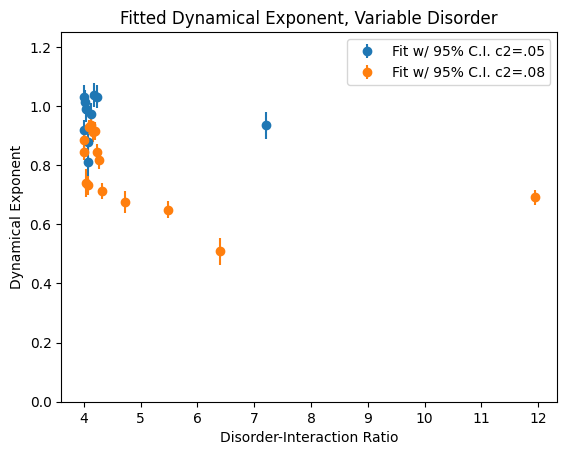

In [58]:
start = 1
end = 25
offset = 4
slope_extraction(
    times,
    data,
    start,
    end,
    xlabel="Disorder-Interaction Ratio",
    ylabel="Dynamical Exponent",
    labelstr="c2=.05",
    offset=offset
)
slope_extraction(
    times,
    data08,
    start,
    end,
    ylabel="Dynamical Exponent",
    labelstr="c2=.08",
    xlabel="Disorder-Interaction Ratio",
    offset=offset
)

dis_range = np.arange(0, 16, 0.01)
#plt.plot(dis_range, -0.0175 * dis_range + 0.95, linestyle="--", color="grey")
#plt.plot(dis_range, -0.0175 * dis_range + 0.75, linestyle="--", color="grey")
plt.ylim([0, 1.25])
#plt.xlim([-0.1, 6])
# plt.vlines(4, 0, 1.5, linestyle="--", color="black", label="Estimated Phase Transition")
plt.legend()
plt.show()

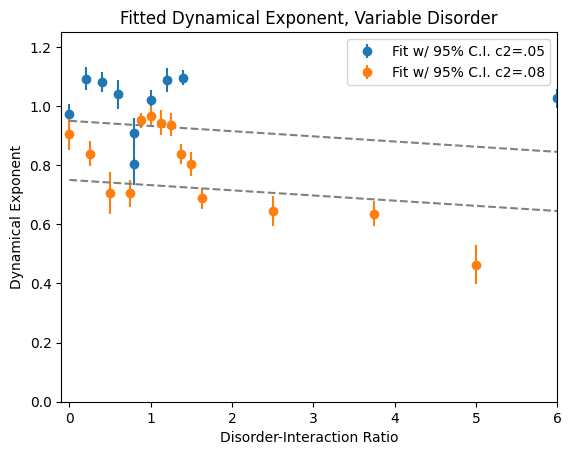

In [46]:
start = 3
end = 25
slope_extraction(
    times,
    data,
    start,
    end,
    xlabel="Disorder-Interaction Ratio",
    ylabel="Dynamical Exponent",
    labelstr="c2=.05",
)
slope_extraction(
    times,
    data08,
    start,
    end,
    ylabel="Dynamical Exponent",
    labelstr="c2=.08",
    xlabel="Disorder-Interaction Ratio",
)

dis_range = np.arange(0, 16, 0.01)
plt.plot(dis_range, -0.0175 * dis_range + 0.95, linestyle="--", color="grey")
plt.plot(dis_range, -0.0175 * dis_range + 0.75, linestyle="--", color="grey")
plt.ylim([0, 1.25])
plt.xlim([-0.1, 6])
# plt.vlines(4, 0, 1.5, linestyle="--", color="black", label="Estimated Phase Transition")
plt.legend()
plt.show()

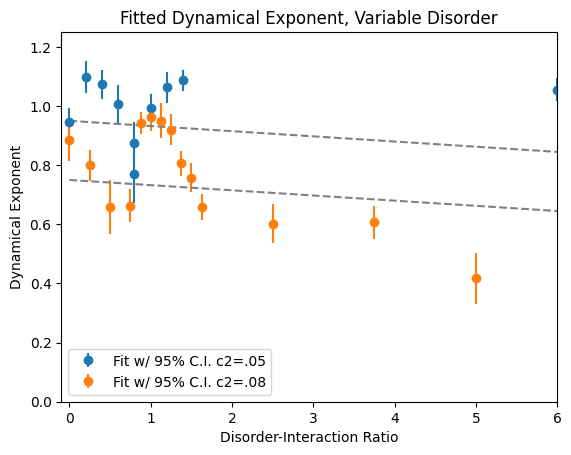

In [47]:
start = 5
end = 25
slope_extraction(
    times,
    data,
    start,
    end,
    xlabel="Disorder-Interaction Ratio",
    ylabel="Dynamical Exponent",
    labelstr="c2=.05",
)
slope_extraction(
    times,
    data08,
    start,
    end,
    ylabel="Dynamical Exponent",
    labelstr="c2=.08",
    xlabel="Disorder-Interaction Ratio",
)

dis_range = np.arange(0, 16, 0.01)
plt.plot(dis_range, -0.0175 * dis_range + 0.95, linestyle="--", color="grey")
plt.plot(dis_range, -0.0175 * dis_range + 0.75, linestyle="--", color="grey")
plt.ylim([0, 1.25])
plt.xlim([-0.1, 6])
# plt.vlines(4, 0, 1.5, linestyle="--", color="black", label="Estimated Phase Transition")
plt.legend()
plt.show()

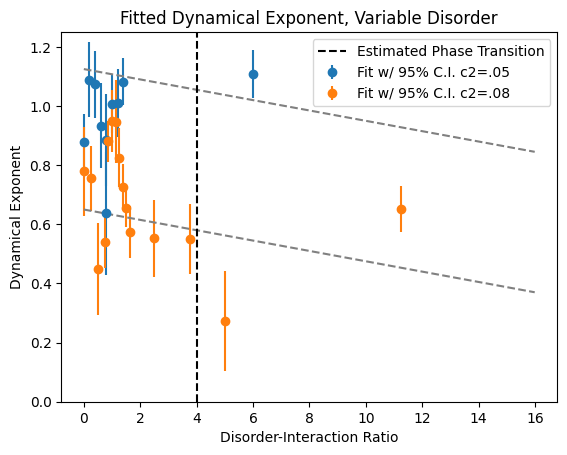

In [48]:
start = 10
end = 25
slope_extraction(
    times,
    data,
    start,
    end,
    ylabel="Dynamical Exponent",
    labelstr="c2=.05",
    xlabel="Disorder-Interaction Ratio",
)
slope_extraction(
    times,
    data08,
    start,
    end,
    ylabel="Dynamical Exponent",
    labelstr="c2=.08",
    xlabel="Disorder-Interaction Ratio",
)

dis_range = np.arange(0, 16, 0.01)
plt.plot(dis_range, -0.0175 * dis_range + 1.125, linestyle="--", color="grey")
plt.plot(dis_range, -0.0175 * dis_range + 0.65, linestyle="--", color="grey")
plt.ylim([0, 1.25])
# plt.xlim([-.1,6])
plt.vlines(4, 0, 1.5, linestyle="--", color="black", label="Estimated Phase Transition")
plt.legend()
plt.show()

In [49]:
expt_3d_c205_other = nmr.Experiment(530, folder="expt9").load_tpc3d(
    use_real=False, normalize=False
)

data05 = {}

c1_vals = [0.01, 0.03, 0.05, 0.07, 0.09, 0.11]
c2 = 0.05

for c1, series in zip(c1_vals, expt_3d_c205_other):

    data05[np.sqrt(c1) / c2] = series

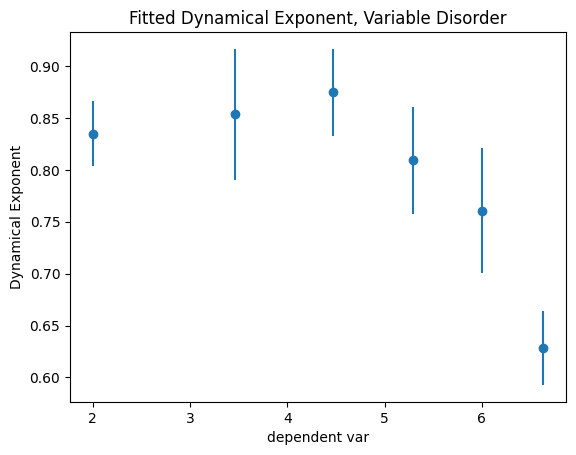

In [50]:
slope_extraction(times, data05, 3, 21, ylabel="Dynamical Exponent")

In [51]:
from scipy.optimize import curve_fit



def power_exponential(x, a, b, c):
    """

    Model function: a * x^b * exp(c * x)
    """

    return a * x**b * np.exp(c * x)



def fit_power_exponential(x_data, y_data):
    """

    Fit the data to the power-exponential model.


    Parameters:

    x_data (array-like): The independent variable data.

    y_data (array-like): The dependent variable data.


    Returns:

    popt (array): Optimal values for the parameters.

    pcov (2d array): The estimated covariance of popt.
    """

    return curve_fit(power_exponential, x_data, y_data, p0=(1e4, -1, -0.0001))



def slope_extraction_alt(
    time, data, start, end, ylabel="Slope", xlabel="dependent var", labelstr=""
):

    slopes = []

    dependent = []

    errs = []

    for key, val in data.items():

        x_data = time[start:end]

        y_data = val[start:end]

        dependent.append(key)

        popt, pcov = fit_power_exponential(x_data, y_data)

        slopes.append(-1 * popt[1])

        errs.append(np.sqrt(pcov[1, 1]))


    # plt.scatter(dependent, slopes,label='Fit w/ 95% C.I. ' + labelstr)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title("Fitted Dynamical Exponent, Variable Disorder")

    plt.errorbar(
        dependent,
        slopes,
        yerr=errs,
        linestyle="",
        marker="o",
        label="Fit w/ 95% C.I. " + labelstr,
    )

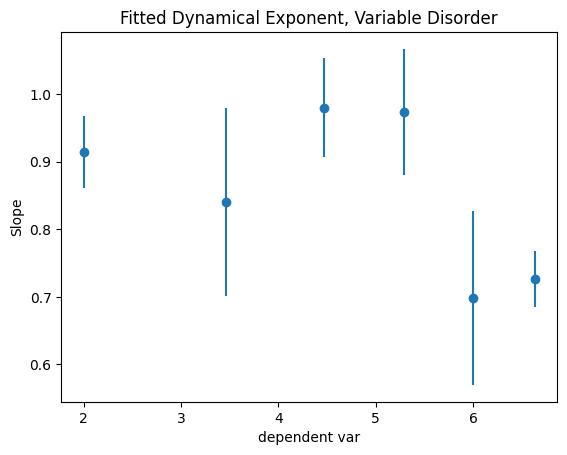

In [52]:
slope_extraction_alt(times, data05, 5, 25)

In [53]:
data05

{np.float64(2.0): array([13836.,  9079.,  6489.,  4822.,  3616.,  2933.,  2559.,  2154.,
         1918.,  1744.,  1651.,  1480.,  1432.,  1305.,  1249.,  1203.,
         1083.,  1077.,  1052.,  1046.,   932.,   949.,   865.,   813.,
          779.]),
 np.float64(3.4641016151377544): array([13859.,  9097.,  6331.,  4486.,  3557.,  2641.,  2429.,  1910.,
         1937.,  1589.,  1486.,  1296.,  1358.,  1176.,  1212.,  1003.,
         1090.,   946.,  1071.,   820.,   903.,   714.,   793.,   681.,
          805.]),
 np.float64(4.472135954999579): array([13786.,  9259.,  6364.,  4729.,  3600.,  2838.,  2409.,  2023.,
         1851.,  1615.,  1565.,  1387.,  1329.,  1207.,  1114.,  1050.,
         1027.,   938.,  1000.,   974.,   884.,   776.,   871.,   738.,
          681.]),
 np.float64(5.291502622129181): array([13410.,  9211.,  6307.,  4614.,  3621.,  2837.,  2486.,  2225.,
         2061.,  1883.,  1639.,  1524.,  1419.,  1269.,  1221.,  1110.,
         1119.,  1062.,  1015.,  1087.,  11

In [54]:
start = 3
end = 25

x_data = times[start:end]
y_data = expt_3d_c205_other[0][start:end]
popt, pcov = fit_power_exponential(x_data, y_data)
print("Optimal parameters:", popt)

Optimal parameters: [ 1.29279498e+06 -9.97056345e-01  1.66377782e-04]


In [55]:
np.sqrt(pcov[1, 1])

np.float64(0.024520401901469268)

In [56]:
def variable_start_fit(t_data, signal, starts, end):
    powers = []
    for start in starts:
        x = t_data[start:end]
        y = signal[start:end]
        popt, pcov = fit_power_exponential(x, y)
        powers.append(-1 * popt[1])
    plt.scatter(starts, powers)

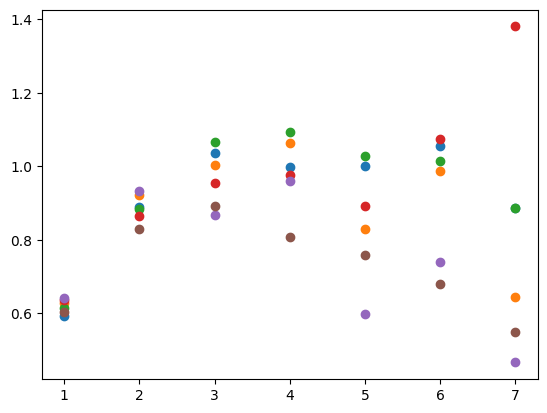

In [57]:
for sig in expt_3d_c205_other:
    variable_start_fit(times, sig, list(range(1, 8, 1)), 22)
plt.show()